# Task 2 - The Sparks Foundation


# Prediction Using Unsupervised Learning

# Task : From the given 'Iris' dataset,Predict the optimum number of clusters and represent it visually

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Focusing on PetalLength and PetalWidth

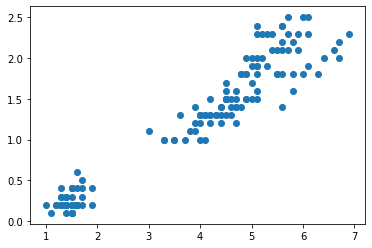

In [5]:
plt.scatter(df.PetalLengthCm,df.PetalWidthCm)

# using minmaxscaler to transform range 0 to 1

In [6]:

scaler = MinMaxScaler()

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scaler.transform(df[['PetalWidthCm']])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa


# let's find out number of clusters needed

In [7]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [8]:
sse

[28.39151435836871,
 5.179687509974784,
 1.7050986081225126,
 1.1621031930971286,
 0.85708565532164,
 0.6838778258523466,
 0.568901600934125,
 0.48903237532185284,
 0.41553886303600984]

# Number of cluster needed are 3

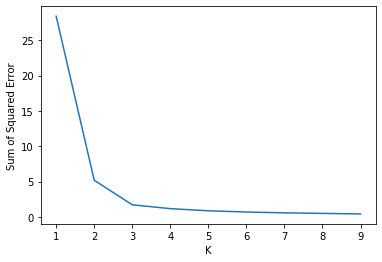

In [9]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

In [10]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df['Cluster'] = y_predicted
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1
...,...,...,...,...,...,...,...
95,96,5.7,3.0,0.542373,0.458333,Iris-versicolor,0
96,97,5.7,2.9,0.542373,0.500000,Iris-versicolor,0
97,98,6.2,2.9,0.559322,0.500000,Iris-versicolor,0
98,99,5.1,2.5,0.338983,0.416667,Iris-versicolor,0


In [12]:
km.cluster_centers_ #for centroids


array([[0.55867014, 0.51041667],
       [0.07864407, 0.06      ],
       [0.7740113 , 0.81510417]])

# Visualizing the cluster

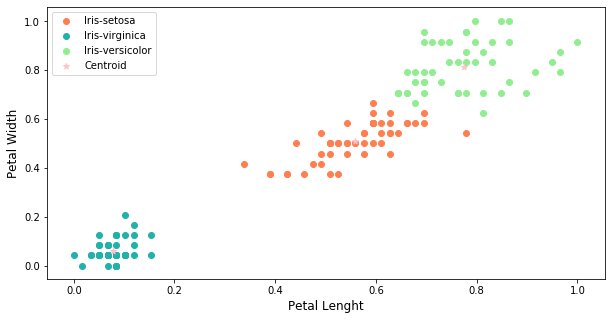

In [13]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]

plt.figure(figsize=(10,5))
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='coral',label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='lightseagreen',label='Iris-virginica')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='lightgreen',label='Iris-versicolor')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='pink',marker="*",label='Centroid')

plt.xlabel('Petal Lenght',fontsize=12)
plt.ylabel('Petal Width',fontsize=12)
plt.legend()
plt.show()


# Task 2 Completed